# Data 620 Final Project
## Pride and Prejudice and Oliver Twist - A Comparison Using Network Analysis and Text Processing
Jit Seneviratne and Sheryl Piechocki  
July 17, 2020

**Data**  
The data used in this project is the texts of two classic books, <u>Pride and Prejudice</u> by Jane Austen and <u>Oliver Twist</u> by Charles Dickens.  The text of both of these books is available on the Project Gutenberg website. 

Sources: 
* [Pride and Prejudice](https://www.gutenberg.org/files/1342/1342-0.txt)
* [Oliver Twist](http://www.gutenberg.org/cache/epub/730/pg730.txt)

**Analysis**  
After reading in the text of both books, they were cleaned and lemmatized and split into chapters.  Network analysis of the character projections was performed, including degree centrality and betweenness centrality measures.  Network graphs by volume were created to determine how the character networks changed over time in the books.  
Text analysis for each book includes the count of unique words, Zipf's law examination, most frequent words by chapter, character vector similarity using Word2Vec, and sentiment analysis at a sentence level for each chapter and compare the two novels for their general sentiment.

[Video clip Part 1](https://youtu.be/KuO9669ACfg)

### Import modules and libraries for use

In [1]:
import nltk
import urllib
import pandas as pd
from nltk.corpus import wordnet
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from textblob import TextBlob
from nltk.util import ngrams
from collections import Counter
from operator import itemgetter
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse.linalg import svds
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import os
import re
from sklearn.manifold import TSNE
from collections import defaultdict
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
import gensim
import string
from gensim import corpora
import networkx as nx
import matplotlib.pyplot as plt
from plotly.offline import iplot, plot
import plotly.graph_objs as go
import numpy as np
from plotly.offline import init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import pickle

### Get texts from Gutenberg

In [2]:
pride = urllib.request.urlopen('https://www.gutenberg.org/files/1342/1342-0.txt').read()
pride_lines = pride.decode('utf8')

oliver = urllib.request.urlopen('http://www.gutenberg.org/cache/epub/730/pg730.txt').read()
oliver_lines = oliver.decode('utf8')

### Function to search chapters

In [3]:
def find_chapters_PP(book):
    chapters = {}
    i = 0
    b = 0
    for x in range(1, 62):
        i = book.find("Chapter", + b)
        b = book.find("Chapter", i + 1)
        chapters['Chapter {}'.format(x)] = book[i:b]
    return chapters

def find_chapters_OT(book):
    chapters = {}
    i = 0
    b = 0
    for x in range(1, 54):
        i = book.find("CHAPTER ", + b)
        b = book.find("CHAPTER ", i + 1)
        chapters['Chapter {}'.format(x)] = book[i:b]
    return chapters

### Stopwords, cleaning and lemmatizing

In [4]:
stop_PP = stopwords.words('english') +  ['mr',
                                         'mrs',
                                         'miss', 
                                         'say',
                                         'have', 
                                         'might',
                                         'thought',
                                         'would', 
                                         'could', 
                                         'make', 
                                         'much',
                                         'dear',
                                         'must',
                                         'know',
                                         'one',
                                         'good',
                                         'every',
                                         'towards',
                                         'give',
                                         'come',
                                         'go',
                                         'elizabeth', 
                                         'darcy', 
                                         'bingley', 
                                         'catherine',
                                         'mrbennet', 
                                         'mrsbennet', 
                                         'lydia',
                                         'wickham',
                                         'caroline',
                                         'jane',
                                         'collins',
                                         'charlotte',
                                         'kitty',
                                         'mary',
                                         'fitzwilliam',
                                         'mrgardiner',
                                         'mrsgardiner',
                                         'georgiana',
                                         'well',
                                         'see',
                                         'think',
                                         'though',
                                         'never',
                                         'always',
                                         'although',
                                         'may',
                                         'soon',
                                         'wish',
                                         'take',
                                         'great',
                                         'nothing',
                                         'something',
                                         'young',
                                         'look',
                                         'even',
                                         'cannot',
                                         'many',
                                         'few',
                                         'even',
                                         'however',
                                         'like',
                                         'lucas'
                                         'ever',
                                         'feel',
                                         'shall',
                                         'hope',
                                         'sure',
                                         'yes',
                                         'no',
                                         'oh',
                                         'two',
                                         'three',
                                         'first',
                                         'second',
                                         'third',
                                         'with',
                                         'without',
                                         'use',
                                         'quite',
                                         'netherfield',
                                         'meryton',
                                         'lucas']

stop_OT = stopwords.words('english') + ['mr',
                                       'mrs',
                                       'miss', 
                                       'say',
                                       'have', 
                                       'might',
                                       'thought',
                                       'would', 
                                       'could', 
                                       'make',   
                                       'much',
                                       'dear',
                                       'must',
                                       'know',
                                       'one',
                                       'good',
                                       'every',
                                       'towards',
                                       'give',
                                       'come',
                                       'go',
                                       'well',
                                       'see',
                                       'think',
                                       'though',
                                       'never',
                                       'always',
                                       'although',
                                       'may',
                                       'soon',
                                       'wish',
                                       'take',
                                       'great',
                                       'nothing',
                                       'something',
                                       'young',
                                       'look',
                                       'even',
                                       'cannot',
                                       'many',
                                       'few',
                                       'even',
                                       'however',
                                       'like',
                                       'lucas'
                                       'ever',
                                       'feel',
                                       'shall',
                                       'hope',
                                       'sure',
                                       'yes',
                                       'no',
                                       'oh',
                                       'two',
                                       'three',
                                       'first',
                                       'second',
                                       'third',
                                       'with',
                                       'without',
                                       'use',
                                       'quite',
                                       'dont',
                                       'oliver',
                                       'fagin',
                                       'nancy',
                                       'bill',
                                       'dodger',
                                       'mrbrownlow',
                                       'mrbumble',
                                       'charley',
                                       'dodger',
                                       'mrsowerberry',
                                       'mrssowerberry',
                                       'mrsmaylie',
                                       'noah',
                                       'charlotte',
                                       'sikes',
                                       'maylie',
                                       'bates',
                                       'toby' ,
                                       'gamfield',
                                       'grimwig',
                                       'barney',
                                       'chitling',
                                       'harry',
                                       'giles',
                                       'monk',
                                       'jew']

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return 'n'
    
def lemmatize_word(word):
    lemmatizer = WordNetLemmatizer()
    try:
        tag = get_wordnet_pos(nltk.pos_tag([word])[0][1])
        return lemmatizer.lemmatize(word, pos=tag)
    except:
        pass

### Split corpus into sentences, clean and lemmatize functions

In [5]:
def replace_func(corpus):
    
        corpus = corpus.replace('Oliver Twist', 'Oliver')\
                     .replace('Bill Sikes', 'Bill')\
                     .replace('Mr. Brownlow', 'MrBrownlow')\
                     .replace('Mr. Bumble', 'MrBumble')\
                     .replace('Charley Bates', 'Charley')\
                     .replace('Artful Dodger', 'Dodger')\
                     .replace('Mr. Sowerberry', 'MrSowerberry')\
                     .replace('Mrs. Sowerberry', 'MrsSowerberry')\
                     .replace('Mrs. Maylie', 'MrsMaylie')\
                     .replace('Jew', 'Fagin')\
                     .replace('Noah Claypole', 'Noah')\
                     .replace('Fitzwilliam Darcy','Darcy')\
                     .replace('Fitzwilliam', 'Darcy')\
                     .replace('Lizzy','Elizabeth')\
                     .replace('LIZZY','Elizabeth')\
                     .replace('Mrs. Collins', 'Charlotte')\
                     .replace('Charlotte Lucas', 'Charlotte')\
                     .replace('Mr. Bennet', 'MrBennet')\
                     .replace('Mrs. Bennet', 'MrsBennet')\
                     .replace('Mr. Gardiner', 'MrGardiner')\
                     .replace('Mrs. Gardiner', 'MrsGardiner')
        return corpus
    

In [6]:
def all_sentences(corpus,
                  stop=False):
    vocab = []
    
    text = replace_func(corpus)
    
    sentiment_list = []
    
    for line in sent_tokenize(text):
        
        line= re.sub('[%s]|Chapter' % re.escape(string.punctuation), '', line)
        line = re.sub('[^a-zA-Z\s]', '', line)
        line = line.lower()
        line = line.split()
        if stop:
            line = [lemmatize_word(x) for x in line if lemmatize_word(x) not in stop]
        else:
            line = [lemmatize_word(x) for x in line]
        vocab.append(line)
    return vocab

### Function to get word frequencies

In [7]:
def get_frequecies(corpus):
    dictionary = corpora.Dictionary(corpus)
    # You can check the mapping by caling 'token2id' attribute.
    id_map = dictionary.token2id
    count_map = dictionary.dfs
    word_count = {}
    for word, id_ in id_map.items():
        word_count[word] = count_map[id_]
    sorted_corpus = sorted([(x,y) 
                           for x,y in word_count.items()], 
                           key=lambda x: x[1], reverse=True)
    return sorted_corpus

### Top Keywords in Each Book


In [8]:
full_corpus_PP = all_sentences(pride_lines[2229:-19175],
                               stop=stop_PP)
frequencies_PP = get_frequecies(full_corpus_PP)

print('Pride and Prejudice\n_______________________________________\n')
print('Top 10 Words by Frequency')
print('----------------------------------')
print('Word         Frequency')
print('----------------------------------')
for word, freq in sorted([(x,y) 
              for x,y in dict(frequencies_PP).items()], 
              key=lambda x: x[1], reverse=True)[:10]:
    print('{:<12}  {}'.format(word, freq))
    
full_corpus_OT = all_sentences(oliver_lines[6255:-19184],
                               stop=stop_OT)
frequencies_OT = get_frequecies(full_corpus_OT)
print('\nOliver Twist\n_______________________________________\n')
print('Top 10 Words by Frequency')
print('----------------------------------')
print('Word         Frequency')
print('----------------------------------')
for word, freq in sorted([(x,y) 
              for x,y in dict(frequencies_OT ).items()], 
              key=lambda x: x[1], reverse=True)[:10]:
    print('{:<11}  {}'.format(word, freq))

Pride and Prejudice
_______________________________________

Top 10 Words by Frequency
----------------------------------
Word         Frequency
----------------------------------
sister        286
lady          252
time          217
little        182
day           159
friend        158
family        156
man           145
manner        137
reply         132

Oliver Twist
_______________________________________

Top 10 Words by Frequency
----------------------------------
Word         Frequency
----------------------------------
reply        519
upon         438
old          426
man          375
boy          352
time         349
gentleman    345
hand         328
little       261
eye          251


The top 10 words in each book is shown above.  Pride and Prejudice top words contain sister, lady, friend, and family.  These words are fitting for a novel about 5 sisters that are looking to get married.  Oliver Twist has top words including old, man, and boy.  These, too, fit the novel as Oliver Twist centers around an orphan boy and his encounters with various men.

### Total Unique Words  
  

In [9]:
print('Count of Unique Words (excluding Stop Words)\n___________________________________________\n') 
print('Pride and Prejudice ', len(frequencies_PP)) 
print('Oliver Twist        ', len(frequencies_OT)) 

Count of Unique Words (excluding Stop Words)
___________________________________________

Pride and Prejudice  4968
Oliver Twist         8500


Pride and Prejudice contains only 4,968 unique words, compared to 8,500 unique words in Oliver Twist.  Part of the difference in unique word counts can be attributed to the length of the books.  According to barnesandnoble.com, Oliver Twist is 512 pages and Pride and Prejudice is 432 pages.  However, even after taking into account the book length, there is still a vast difference in unique words.  

### Check to see if corpus of each book follows Zipf's law  
 

In [10]:
full_corpus2_PP = all_sentences(pride_lines[2229:-19175], 
                                stop=False)
frequencies2_PP = get_frequecies(full_corpus2_PP)
samples_PP = list(dict(frequencies2_PP).keys())
freqs_PP = list(dict(frequencies2_PP).values())

df_words_PP = pd.DataFrame()
df_words_PP['frequency'] = freqs_PP
df_words_PP['word'] = samples_PP

full_corpus2_OT = all_sentences(oliver_lines[6255:-19184].replace('\r',' '), 
                                stop=False)
frequencies2_OT = get_frequecies(full_corpus2_OT)
samples_OT = list(dict(frequencies2_OT).keys())
freqs_OT = list(dict(frequencies2_OT).values())

df_words_OT = pd.DataFrame()
df_words_OT['frequency'] = freqs_OT
df_words_OT['word'] = samples_OT

In [11]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=np.log(df_words_PP['frequency']), 
                         x=np.log(df_words_PP.index + 1), 
                         name='Pride and Prejudice'))

fig.update_layout(go.Layout(
    title='Word Rank vs Word Frequency Comparison<br>Pride and Prejudice vs. Oliver Twist<br><sub>Including Stop Words</sub>',
    width=800,
    height=500,
    xaxis=dict(
        title='Log Rank' 
    ),
    yaxis=dict(
        title='Log Frequency', tickfont=dict(size=7)
    )
))

fig.add_trace(go.Scatter(y=np.log(df_words_OT['frequency']), 
                         x=np.log(df_words_OT.index + 1), 
                         name='Oliver Twist'))


fig.show()

Even though there is the vast difference in unique words between the books, both still adhere to Zipf's law.  In the graph above, it appears that Oliver Twist follows Zipf's Law a little more closely than Pride and Prejudice, as evidenced by a slightly straighter line. 

### Top Keywords in each chapter

In [12]:
text_PP = find_chapters_PP(pride_lines[2229:-19175])
for chapter in ['Chapter {}'.format(x) for x in range(1, 62)]:
    corpus_PP = all_sentences(text_PP[chapter],
                              stop=stop_PP)
    print('{}'.format(chapter), get_frequecies(corpus_PP)[:5])

Chapter 1 [('visit', 5), ('man', 4), ('single', 4), ('wife', 4), ('girl', 4)]
Chapter 2 [('visit', 4), ('acquaintance', 4), ('till', 3), ('wife', 3), ('long', 3)]
Chapter 3 [('dance', 14), ('lady', 8), ('room', 8), ('sister', 7), ('handsome', 6)]
Chapter 4 [('sister', 5), ('people', 4), ('house', 4), ('man', 3), ('character', 3)]
Chapter 5 [('seem', 4), ('believe', 4), ('pride', 4), ('bennet', 3), ('family', 3)]
Chapter 6 [('dance', 10), ('sir', 8), ('lady', 6), ('sister', 6), ('begin', 6)]
Chapter 7 [('mother', 7), ('father', 6), ('officer', 6), ('sister', 5), ('morning', 5)]
Chapter 8 [('sister', 14), ('lady', 7), ('accomplish', 7), ('bennet', 6), ('hurst', 5)]
Chapter 9 [('country', 9), ('mother', 8), ('sister', 5), ('girl', 5), ('daughter', 5)]
Chapter 10 [('letter', 8), ('write', 8), ('friend', 6), ('hurst', 5), ('cry', 5)]
Chapter 11 [('laugh', 6), ('hurst', 6), ('book', 6), ('conversation', 5), ('room', 5)]
Chapter 12 [('carriage', 3), ('day', 3), ('morning', 3), ('sister', 3), 

In [13]:
text_OT = find_chapters_OT(oliver_lines[6255:-19184])
for chapter in ['Chapter {}'.format(x) for x in range(1, 54)]:
    corpus_OT = all_sentences(text_OT[chapter],
                              stop=stop_OT)
    print('{}'.format(chapter), get_frequecies(corpus_OT)[:5])

Chapter 1 [('child', 7), ('surgeon', 7), ('nurse', 5), ('hand', 5), ('head', 4)]
Chapter 2 [('mann', 27), ('gentleman', 19), ('boy', 18), ('beadle', 17), ('board', 14)]
Chapter 3 [('gentleman', 32), ('old', 16), ('boy', 15), ('white', 12), ('waistcoat', 11)]
Chapter 4 [('undertaker', 25), ('boy', 13), ('reply', 11), ('beadle', 10), ('board', 8)]
Chapter 5 [('undertaker', 17), ('old', 15), ('sir', 14), ('reply', 13), ('sowerberry', 13)]
Chapter 6 [('workus', 8), ('head', 6), ('reply', 6), ('mother', 5), ('old', 5)]
Chapter 7 [('reply', 15), ('sir', 12), ('boy', 10), ('time', 7), ('bumble', 7)]
Chapter 8 [('gentleman', 17), ('boy', 14), ('old', 12), ('walk', 11), ('little', 11)]
Chapter 9 [('old', 17), ('reply', 12), ('time', 11), ('boy', 11), ('sir', 11)]
Chapter 10 [('gentleman', 19), ('old', 15), ('stop', 15), ('boy', 12), ('thief', 11)]
Chapter 11 [('fang', 33), ('old', 21), ('man', 19), ('gentleman', 19), ('boy', 15)]
Chapter 12 [('old', 34), ('lady', 26), ('gentleman', 14), ('sir',

### Get edgelist from text characters and chapters  


In [14]:
character_list_PP = ['Elizabeth', 
                     'Darcy', 
                     'Bingley', 
                     'Catherine',
                     'MrBennet', 
                     'MrsBennet',
                     'Lydia',
                     'Wickham',
                     'Caroline',
                     'Jane',
                     'Collins',
                     'Charlotte',
                     'Kitty',
                     'Mary',
                     'Maria',
                     'MrGardiner',
                     'MrsGardiner',
                     'Georgiana']
character_list_OT = ['Oliver',
                     'Fagin',
                     'Nancy',
                     'Bill',
                     'Dodger',
                     'MrBrownlow',
                     'MrBumble',
                     'Charley',
                     'Dodger',
                     'MrSowerberry',
                     'MrsSowerberry',
                     'MrsMaylie',
                     'Noah',
                     'Charlotte',
                     'Monks']

In [15]:
edge_list_PP = []
for chapter in ['Chapter {}'.format(x) for x in range(1, 62)]:
    text_PP[chapter] = replace_func(text_PP[chapter])
    
    for name in character_list_PP:
        #print(chapter, name, len(re.findall(name, text[chapter])))
        edge_list_PP.append((chapter, name, len(re.findall(name, text_PP[chapter]))))

data_df_PP = pd.DataFrame(edge_list_PP)
data_df_PP.columns = ['Chapter', 'Character', 'Weight']
data_df_PP = data_df_PP[data_df_PP['Weight']>0]

In [16]:
edge_list_OT = []
for chapter in ['Chapter {}'.format(x) for x in range(1, 54)]:
    text_OT[chapter] = replace_func(text_OT[chapter])

    for name in character_list_OT:
        #print(chapter, name, len(re.findall(name, text[chapter])))
        edge_list_OT.append((chapter, name, len(re.findall(name, text_OT[chapter]))))

data_df_OT = pd.DataFrame(edge_list_OT)
data_df_OT.columns = ['Chapter', 'Character', 'Weight']
data_df_OT = data_df_OT[data_df_OT['Weight']>0]

### Build graphs

In [17]:
B_PP = nx.Graph()

B_PP.add_nodes_from(data_df_PP['Chapter'],
                 bipartite=0)
B_PP.add_nodes_from(data_df_PP['Character'],
                 bipartite=1)

B_PP.add_weighted_edges_from(
    [(row['Chapter'], 
      row['Character'],
      row['Weight']) for idx, row in data_df_PP.iterrows()])

B_OT = nx.Graph()

B_OT.add_nodes_from(data_df_OT['Chapter'],
                 bipartite=0)
B_OT.add_nodes_from(data_df_OT['Character'],
                 bipartite=1)

B_OT.add_weighted_edges_from(
    [(row['Chapter'], 
      row['Character'],
      row['Weight']) for idx, row in data_df_OT.iterrows()])

### Get character projection

In [18]:
character_filter_PP = {n for n, d in B_PP.nodes(data=True) if d['bipartite']==1}

# project bipartite graph onto character nodes keeping number of co-occurences, weighted degree
B_character_PP = nx.bipartite.weighted_projected_graph(B_PP, character_filter_PP)

character_filter_OT = {n for n, d in B_OT.nodes(data=True) if d['bipartite']==1}

# project bipartite graph onto character nodes keeping number of co-occurences, weighted degree
B_character_OT = nx.bipartite.weighted_projected_graph(B_OT, character_filter_OT)

### Pride and Prejudice Network Graph  


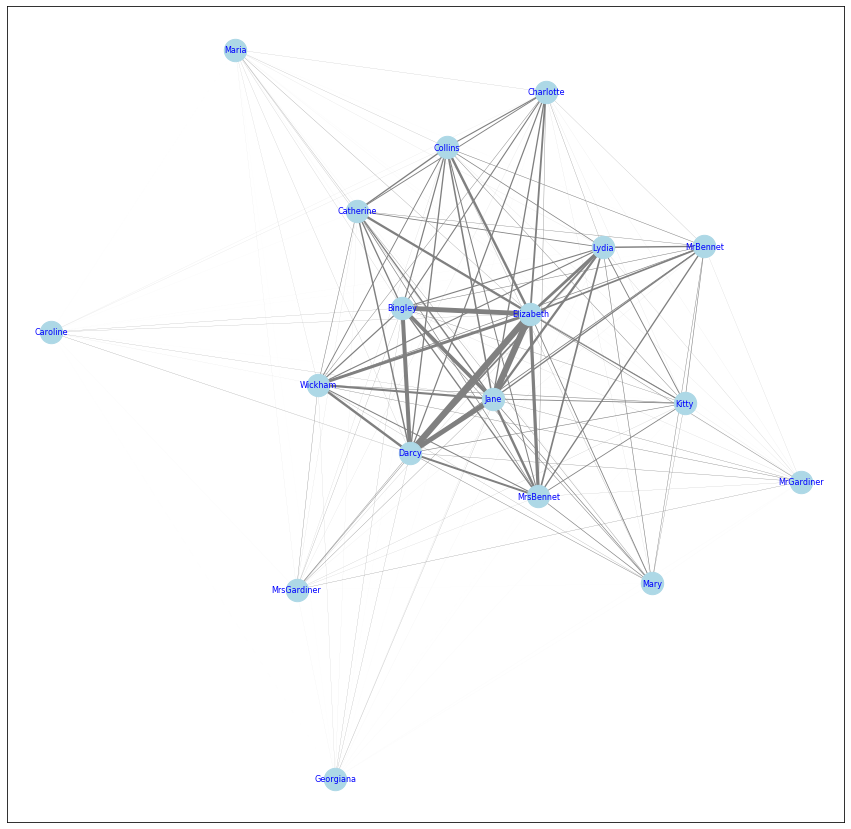

In [19]:
plt.figure(figsize=(15,15));
pos_PP = nx.spring_layout(B_character_PP, iterations = 50);
edges_PP = B_character_PP.edges()
weights_PP = [(B_character_PP[u][v]['weight']/20)**2 for u,v in edges_PP]
nx.draw_networkx_nodes(B_character_PP, pos_PP, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_PP, pos_PP,  edge_color='gray', width=weights_PP);
nx.draw_networkx_labels(B_character_PP, pos_PP, font_size=8, font_color ='blue');

In the character network of Pride and Prejudice, Elizabeth, Jane, Darcy, and Bingley form a close connection in the center of the graph.  These characters have many interactions throughout the book as evidenced by the thicker connecting lines.  The rest of the characters form two sets, a secondary set of intermediary connections to the center core, and an outlying set with minimal connections to fewer characters.

### Oliver Twist Network Graph  


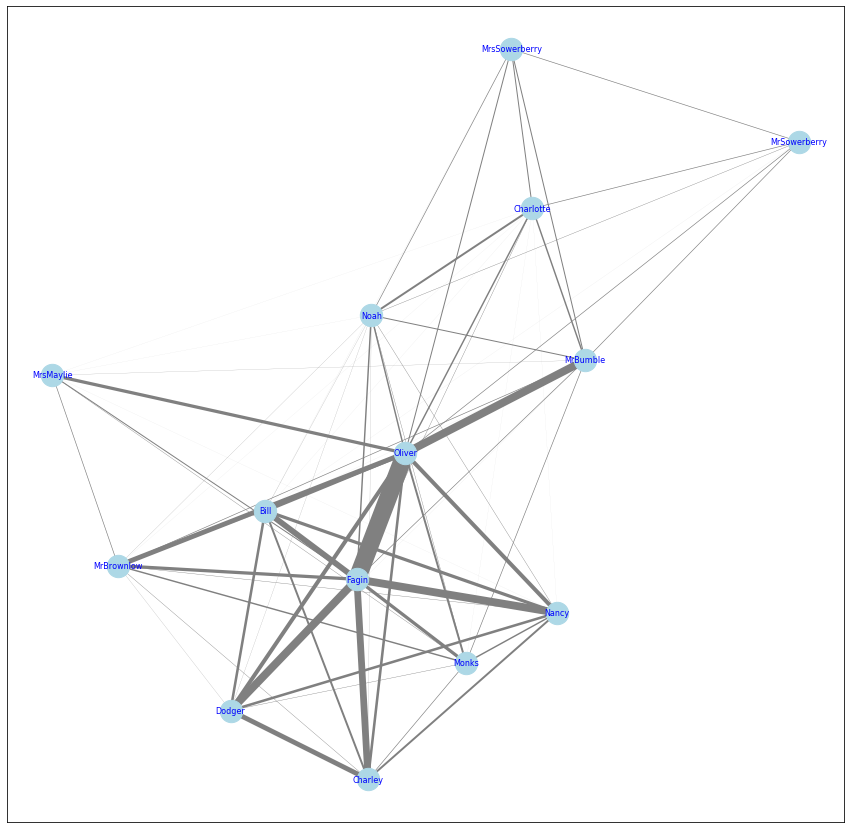

In [20]:
plt.figure(figsize=(15,15));
pos_OT = nx.spring_layout(B_character_OT, iterations = 50);
edges_OT = B_character_OT.edges()
weights_OT = [(B_character_OT[u][v]['weight']/5)**2 for u,v in edges_OT]
nx.draw_networkx_nodes(B_character_OT, pos_OT, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_OT, pos_OT,  edge_color='gray', width=weights_OT);
nx.draw_networkx_labels(B_character_OT, pos_OT, font_size=8, font_color ='blue');

In Oliver Twist, Oliver and Fagin have the strongest connection.  Mr. Bumble and Mr. Brownlow are closely connected to Oliver, while Nancy, Dodger, Charley, and Bill are all very closely connected to Fagin. 

### Network diameter

In [21]:
print('Network Diameter\n___________________________________________\n') 
print('Pride and Prejudice ', nx.diameter(B_PP)) 
print('Oliver Twist        ', nx.diameter(B_OT)) 

Network Diameter
___________________________________________

Pride and Prejudice  4
Oliver Twist         5


Pride and Prejudice has a smaller network, with a diameter of 4, than Oliver Twist, with a diameter of 5.

### Character degree centrality  


In [22]:
char_deg_cent_PP = {k:v for k,v in dict(nx.degree_centrality(B_PP)).items()}
print('Pride and Prejudice\n_______________________________________\n')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent_PP.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))
print(' ')
   
char_deg_cent_OT = {k:v for k,v in dict(nx.degree_centrality(B_OT)).items()}
print('\nOliver Twist\n_______________________________________\n')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent_OT.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))

Pride and Prejudice
_______________________________________

Elizabeth - Degree Centrality: 0.782
Jane - Degree Centrality: 0.641
Darcy - Degree Centrality: 0.641
Bingley - Degree Centrality: 0.564
MrsBennet - Degree Centrality: 0.462
 

Oliver Twist
_______________________________________

Oliver - Degree Centrality: 0.621
Fagin - Degree Centrality: 0.47
MrBumble - Degree Centrality: 0.227
Nancy - Degree Centrality: 0.227
Bill - Degree Centrality: 0.212


Elizabeth has the most connections to other characters, thus she has the highest degree centrality in Pride and Prejuduce.  In Oliver Twist, Oliver has the largest degree centrality, i.e. connections to other characters.  Comparing the books, we see that Elizabeth's degree centrality is higher than Oliver's.

### Character betweenness centrality  


In [23]:
b_bet_cent_PP = {k:v for k,v in dict(nx.betweenness_centrality(B_PP)).items()}
print('Pride and Prejudice\n_______________________________________\n')
for character, cdegree in sorted([(x,y) 
              for x,y in b_bet_cent_PP.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Betweenness Centrality:',round(cdegree,3))
print(' ')
     
b_bet_cent_OT = {k:v for k,v in dict(nx.betweenness_centrality(B_character_OT)).items()}
print('\nOliver Twist\n_______________________________________\n')
for character, cdegree in sorted([(x,y) 
              for x,y in b_bet_cent_OT.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Betweenness Centrality:',round(cdegree,3))

Pride and Prejudice
_______________________________________

Elizabeth - Betweenness Centrality: 0.195
Darcy - Betweenness Centrality: 0.112
Jane - Betweenness Centrality: 0.107
Bingley - Betweenness Centrality: 0.087
MrsBennet - Betweenness Centrality: 0.05
 

Oliver Twist
_______________________________________

Noah - Betweenness Centrality: 0.055
Oliver - Betweenness Centrality: 0.055
Bill - Betweenness Centrality: 0.043
MrBumble - Betweenness Centrality: 0.033
Charlotte - Betweenness Centrality: 0.031


Both Elizabeth and Oliver have the highest betweenness centrality in their respective books, but comparing the two, we see Elizabeth has a much higher betweenness centrality than Oliver.  Therefore, she acts as a bridge to other characters in Pride and Prejudice more often than Oliver does in Oliver Twist.

### Pride and Prejudice Networks by Volume

In [24]:
edges_V1_PP = [(u,v) for u,v,e in B_PP.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(1, 24)]]
B_V1_PP = B_PP.edge_subgraph(edges_V1_PP)

#print(edges_V1)
character_filter_V1_PP = {n for n, d in B_V1_PP.nodes(data=True) if d['bipartite']==1}
B_character_V1_PP = nx.bipartite.weighted_projected_graph(B_V1_PP, character_filter_V1_PP)

In [25]:
edges_V2_PP = [(u,v) for u,v,e in B_PP.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(24, 43)]]
B_V2_PP = B_PP.edge_subgraph(edges_V2_PP)

#print(edges_V2)
character_filter_V2_PP = {n for n, d in B_V2_PP.nodes(data=True) if d['bipartite']==1}
B_character_V2_PP = nx.bipartite.weighted_projected_graph(B_V2_PP, character_filter_V2_PP)

In [26]:
edges_V3_PP = [(u,v) for u,v,e in B_PP.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(43, 62)]]
B_V3_PP = B_PP.edge_subgraph(edges_V3_PP)

#print(edges_V3)
character_filter_V3_PP = {n for n, d in B_V3_PP.nodes(data=True) if d['bipartite']==1}
B_character_V3_PP = nx.bipartite.weighted_projected_graph(B_V3_PP, character_filter_V3_PP)

### Pride and Prejudice Network Graphs by Volume  


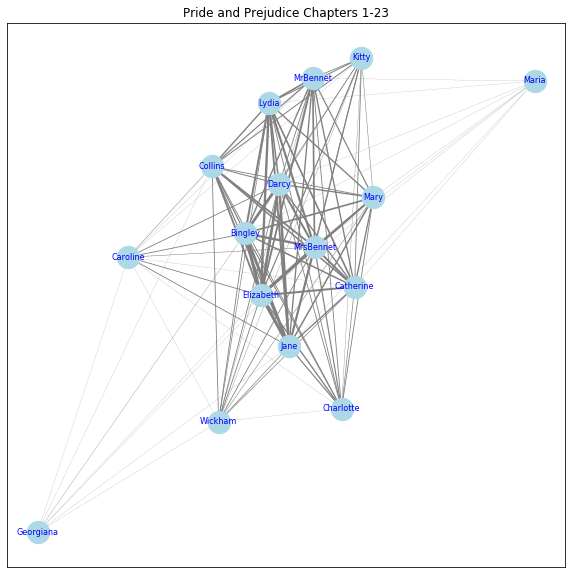

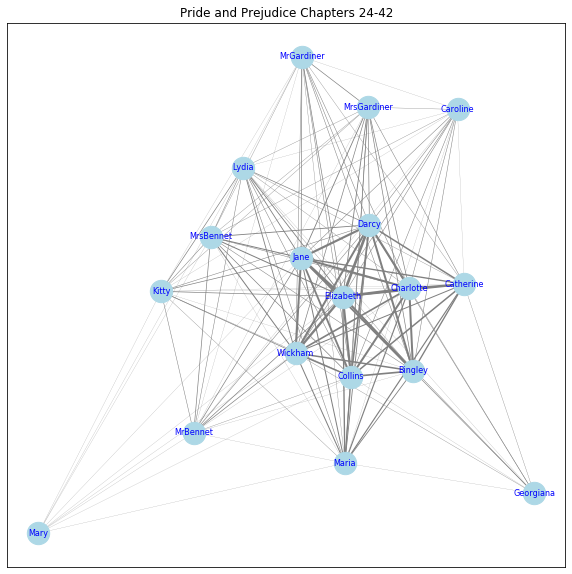

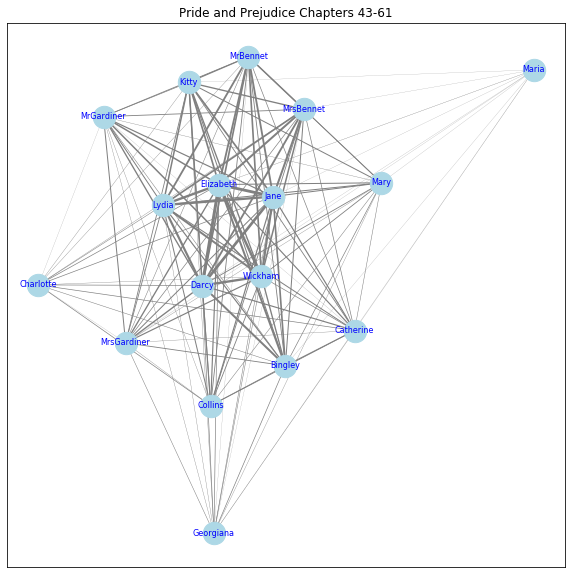

In [27]:
plt.figure(figsize=(10,10));
plt.figure(1)
pos1_PP = nx.spring_layout(B_character_V1_PP, iterations = 50);
edges_V1_PP = B_character_V1_PP.edges()
weights_V1_PP = [(B_character_V1_PP[u][v]['weight']/6) for u,v in edges_V1_PP]
nx.draw_networkx_nodes(B_character_V1_PP, pos1_PP, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V1_PP, pos1_PP,  edge_color='gray', width=weights_V1_PP);
nx.draw_networkx_labels(B_character_V1_PP, pos1_PP, font_size=8, font_color ='blue');
plt.title('Pride and Prejudice Chapters 1-23')

plt.figure(figsize=(10,10));
plt.figure(2)
pos2_PP = nx.spring_layout(B_character_V2_PP, iterations = 50);
edges_V2_PP = B_character_V2_PP.edges()
weights_V2_PP = [(B_character_V2_PP[u][v]['weight']/6) for u,v in edges_V2_PP]
nx.draw_networkx_nodes(B_character_V2_PP, pos2_PP, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V2_PP, pos2_PP,  edge_color='gray', width=weights_V2_PP);
nx.draw_networkx_labels(B_character_V2_PP, pos2_PP, font_size=8, font_color ='blue');
plt.title('Pride and Prejudice Chapters 24-42')

plt.figure(figsize=(10,10));
plt.figure(3)
pos3_PP = nx.spring_layout(B_character_V3_PP, iterations = 50);
edges_V3_PP = B_character_V3_PP.edges()
weights_V3_PP = [(B_character_V3_PP[u][v]['weight']/6) for u,v in edges_V3_PP]
nx.draw_networkx_nodes(B_character_V3_PP, pos3_PP, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V3_PP, pos3_PP,  edge_color='gray', width=weights_V3_PP);
nx.draw_networkx_labels(B_character_V3_PP, pos3_PP, font_size=8, font_color ='blue');
plt.title('Pride and Prejudice Chapters 43-61')

plt.show()

Pride and Prejudice can be divided into three volumes by chapters.  Volume 1 is Chapters 1 - 23, volume 2 is Chapters 24 - 42, and volume 3 is Chapters 43 to the end.  The three network graphs above correspond to the three volumes.  Volume 1 has core strong connections between Elizabeth, Mrs. Bennet, Jane, and Bingley.  In volume 2, the strongest connections are now between Elizabeth, Charlotte, Darcy, and Jane.  Lastly, in volume 3 there are many equal strength connections between a much larger group of characters.  As the story comes to an end, many of the characters come together.

### Oliver Twist Networks by Volume

In [28]:
edges_V1_OT = [(u,v) for u,v,e in B_OT.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(1, 23)]]
B_V1_OT = B_OT.edge_subgraph(edges_V1_OT)

#print(edges_V1)
character_filter_V1_OT = {n for n, d in B_V1_OT.nodes(data=True) if d['bipartite']==1}
B_character_V1_OT = nx.bipartite.weighted_projected_graph(B_V1_OT, character_filter_V1_OT)

In [29]:
edges_V2_OT = [(u,v) for u,v,e in B_OT.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(23, 37)]]
B_V2_OT = B_OT.edge_subgraph(edges_V2_OT)

#print(edges_V2)
character_filter_V2_OT = {n for n, d in B_V2_OT.nodes(data=True) if d['bipartite']==1}
B_character_V2_OT = nx.bipartite.weighted_projected_graph(B_V2_OT, character_filter_V2_OT)

In [30]:
edges_V3_OT = [(u,v) for u,v,e in B_OT.edges(data=True) if u  in ['Chapter {}'.format(x) for x in range(37, 54)]]
B_V3_OT = B_OT.edge_subgraph(edges_V3_OT)

#print(edges_V3)
character_filter_V3_OT = {n for n, d in B_V3_OT.nodes(data=True) if d['bipartite']==1}
B_character_V3_OT = nx.bipartite.weighted_projected_graph(B_V3_OT, character_filter_V3_OT)

### Oliver Twist Network Graphs by Volume  


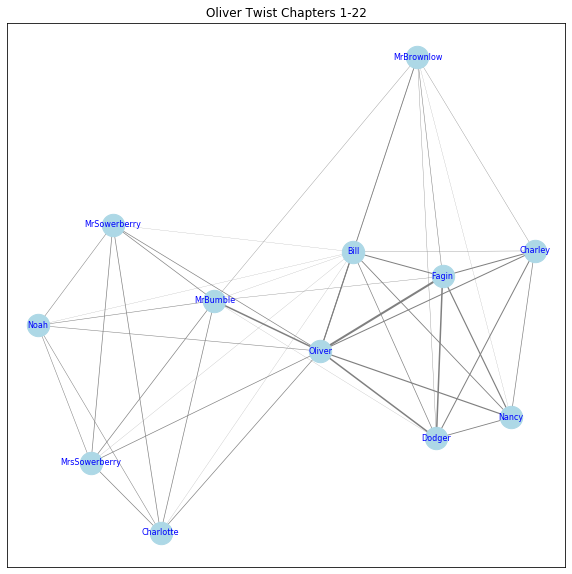

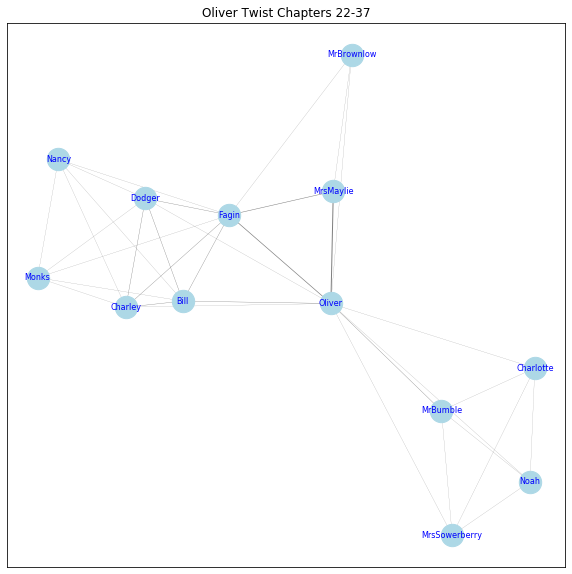

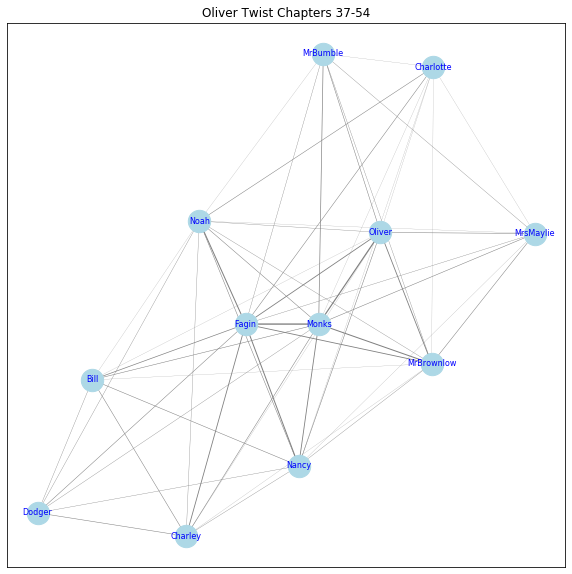

In [31]:
plt.figure(figsize=(10,10));
plt.figure(1)
pos1_OT = nx.spring_layout(B_character_V1_OT, iterations = 50);
edges_V1_OT = B_character_V1_OT.edges()
weights_V1_OT = [(B_character_V1_OT[u][v]['weight']/6) for u,v in edges_V1_OT]
nx.draw_networkx_nodes(B_character_V1_OT, pos1_OT, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V1_OT, pos1_OT,  edge_color='gray', width=weights_V1_OT);
nx.draw_networkx_labels(B_character_V1_OT, pos1_OT, font_size=8, font_color ='blue');
plt.title('Oliver Twist Chapters 1-22')

plt.figure(figsize=(10,10));
plt.figure(2)
pos2_OT = nx.spring_layout(B_character_V2_OT, iterations = 50);
edges_V2_OT = B_character_V2_OT.edges()
weights_V2 = [(B_character_V2_OT[u][v]['weight']/6) for u,v in edges_V2_OT]
nx.draw_networkx_nodes(B_character_V2_OT, pos2_OT, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V2_OT, pos2_OT,  edge_color='gray', width=weights_V2);
nx.draw_networkx_labels(B_character_V2_OT, pos2_OT, font_size=8, font_color ='blue');
plt.title('Oliver Twist Chapters 22-37')

plt.figure(figsize=(10,10));
plt.figure(3)
pos3_OT = nx.spring_layout(B_character_V3_OT, iterations = 50);
edges_V3_OT = B_character_V3_OT.edges()
weights_V3_OT = [(B_character_V3_OT[u][v]['weight']/6) for u,v in edges_V3_OT]
nx.draw_networkx_nodes(B_character_V3_OT, pos3_OT, node_color='lightblue', node_size=500);
nx.draw_networkx_edges(B_character_V3_OT, pos3_OT,  edge_color='gray', width=weights_V3_OT);
nx.draw_networkx_labels(B_character_V3_OT, pos3_OT, font_size=8, font_color ='blue');
plt.title('Oliver Twist Chapters 37-54')

plt.show()

Oliver Twist can also be divided into three volumes by chapter.  Chapters 1 - 22 comprise volume 1.  Chapters 23 - 36 make up volume 2, and volume 3 containes chapters 37 to the end.  Looking at the character network in volume 1, we see two distinct groups with Oliver in the middle.  Oliver shares connections with a group containing Mr. Bumble, Mr. and Mrs. Sowerberry, Noah and Charlotte.  He also is part of the group containing Bill, Fagin, Dodger, Nancy, and Charley.  Again in volume 2 we see two groupings of characters with Oliver in the middle.  However, in volume 3 there is just one main network that has main connections between Oliver and Monks and also between Monks and Fagin.

### Character degree centrality by Volume  


In [32]:
char_deg_cent1_PP = {k:v for k,v in dict(nx.degree_centrality(B_V1_PP)).items()}
print('Pride and Prejudice\n_______________________________________\n')
print('Volume 1')

for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent1_PP.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))
print('-----------------------------------------------')    
char_deg_cent2_PP = {k:v for k,v in dict(nx.degree_centrality(B_V2_PP)).items()}
print('Volume 2')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent2_PP.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))
print('-----------------------------------------------')    
char_deg_cent3_PP = {k:v for k,v in dict(nx.degree_centrality(B_V3_PP)).items()}
print('Volume 3')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent3_PP.items()], 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))

Pride and Prejudice
_______________________________________

Volume 1
Elizabeth - Degree Centrality: 0.605
Bingley - Degree Centrality: 0.5
MrsBennet - Degree Centrality: 0.474
Jane - Degree Centrality: 0.474
Darcy - Degree Centrality: 0.421
-----------------------------------------------
Volume 2
Elizabeth - Degree Centrality: 0.528
Darcy - Degree Centrality: 0.444
Charlotte - Degree Centrality: 0.417
Jane - Degree Centrality: 0.417
Wickham - Degree Centrality: 0.389
-----------------------------------------------
Volume 3
Elizabeth - Degree Centrality: 0.543
Darcy - Degree Centrality: 0.514
Jane - Degree Centrality: 0.486
Wickham - Degree Centrality: 0.429
Lydia - Degree Centrality: 0.4


The degree centralities by volume fit with what we saw depicted in the network graphs.  In all volumes, Elizabeth has the highest degree centrality, forming a core group with differing sets of characters based on the volume.  The top 5 highest degree centrality values in volume 3 are very close to each other.  This was noted in the graph as many equal strength connections as the story is brought to a close bringing the characters together.

In [33]:
char_deg_cent1_OT = {k:v for k,v in dict(nx.degree_centrality(B_V1_OT)).items()}
print('Oliver Twist\n_______________________________________\n')
print('Volume 1')

for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent1_OT.items()  if x not in ['Chapter {}'.format(x) for x in range(1, 23)]]     , 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))
print('-----------------------------------------------')    
char_deg_cent2_OT = {k:v for k,v in dict(nx.degree_centrality(B_V2_OT)).items()}
print('Volume 2')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent2_OT.items() if x not in ['Chapter {}'.format(x) for x in range(23, 37)]]     , 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))
print('-----------------------------------------------')    
char_deg_cent3_OT = {k:v for k,v in dict(nx.degree_centrality(B_V3_OT)).items()}
print('Volume 3')
for character, cdegree in sorted([(x,y) 
              for x,y in char_deg_cent3_OT.items() if x not in ['Chapter {}'.format(x) for x in range(37,54)]]     , 
              key=lambda x: x[1], reverse=True)[:5]:
    print('{} -'.format(character), 'Degree Centrality:',round(cdegree,3))

Oliver Twist
_______________________________________

Volume 1
Oliver - Degree Centrality: 0.667
Fagin - Degree Centrality: 0.364
MrBumble - Degree Centrality: 0.273
Dodger - Degree Centrality: 0.273
Bill - Degree Centrality: 0.212
-----------------------------------------------
Volume 2
Oliver - Degree Centrality: 0.462
MrsMaylie - Degree Centrality: 0.269
Fagin - Degree Centrality: 0.192
Bill - Degree Centrality: 0.115
Dodger - Degree Centrality: 0.077
-----------------------------------------------
Volume 3
Fagin - Degree Centrality: 0.5
Monks - Degree Centrality: 0.393
Oliver - Degree Centrality: 0.25
Nancy - Degree Centrality: 0.25
MrBrownlow - Degree Centrality: 0.214


The degree centralities by volume for Oliver Twist are shown above.  In volume 1, Oliver has the highest degree centrality by far, with Fagin following second.  Volume 2 has Oliver highest again, followed by Mrs. Maylie.  These strong connections were seen in the network graph.  Volume 3 has a switch, with Fagin having the highest degree centrality, followed by Monks.    

### Graph Center  
The center of a graph is the node or set of nodes where the maximum distance to other nodes is the smallest.  

In [34]:
print('Pride and Prejudice Graph Center')
print('Overall:', nx.center(B_PP))
print('Volume 1:',nx.center(B_V1_PP))
print('Volume 2:',nx.center(B_V2_PP))
print('Volume 3:',nx.center(B_V3_PP))

Pride and Prejudice Graph Center
Overall: ['Elizabeth']
Volume 1: ['Elizabeth']
Volume 2: ['Elizabeth']
Volume 3: ['Elizabeth']


In [35]:
print('Oliver Twist Graph Center')
print('Overall:', [re.sub('Chapter\s\d+','', x) for x in nx.center(B_OT) if len(re.sub('Chapter\s\d+','', x)) > 0])
print('Volume 1:',[re.sub('Chapter\s\d+','', x) for x in nx.center(B_V1_OT) if len(re.sub('Chapter\s\d+','', x)) > 0])
print('Volume 2:',[re.sub('Chapter\s\d+','', x) for x in nx.center(B_V2_OT) if len(re.sub('Chapter\s\d+','', x)) > 0])
print('Volume 3:',[re.sub('Chapter\s\d+','', x) for x in nx.center(B_V3_OT) if len(re.sub('Chapter\s\d+','', x)) > 0])

Oliver Twist Graph Center
Overall: ['Oliver', 'Noah']
Volume 1: ['Oliver']
Volume 2: []
Volume 3: ['Monks', 'Noah', 'Fagin']


In Pride and Prejudice, Elizabeth is the center of the overall character network, and also the center in each volume.  In Oliver Twist, overall Oliver and Noah are both graph centers.  In volume 1, Oliver alone is the graph center.  Volume 2 does not have a character as center.  In volume 3, the characters of Monks, Fagin, and Noah are all graph centers.

### Average shortest path  
The average shortest path in a network is a measure of efficiency in a network.  

In [36]:
print('Pride and Prejudice Average Shortest Path')
print('Overall: ',round(nx.average_shortest_path_length(B_PP),2))
print('Volume 1:',round(nx.average_shortest_path_length(B_V1_PP),2))
print('Volume 2:',round(nx.average_shortest_path_length(B_V2_PP),2))
print('Volume 3:',round(nx.average_shortest_path_length(B_V3_PP),2))

Pride and Prejudice Average Shortest Path
Overall:  2.02
Volume 1: 2.05
Volume 2: 2.08
Volume 3: 1.99


In [37]:
print('Oliver Twist Average Shortest Path')
print('Overall: ',round(nx.average_shortest_path_length(B_OT),2))
print('Volume 1:',round(nx.average_shortest_path_length(B_V1_OT),2))
print('Volume 2:',round(nx.average_shortest_path_length(B_V2_OT),2))
print('Volume 3:',round(nx.average_shortest_path_length(B_V3_OT),2))

Oliver Twist Average Shortest Path
Overall:  2.39
Volume 1: 2.22
Volume 2: 2.83
Volume 3: 2.28


Pride and Prejudice has lower average shortest path lengths than Oliver Twist overall and for each volume.  This fits with what we saw in the graphs, where Pride and Prejudice had one large network of characters, but Oliver Twist appeared to have 2 clusters of characters with Oliver in the middle.  We see in both novels, that average shortest path increases from volume 1 to 2, but then decreases in volume 3.  This decrease in volume 3 is probably explained by the various storylines coming together bringing the characters closer together as the story concludes.

### Topic Modeling

Let's explore whether we can glean the essence of each book using topic modeling techniques such as non-negative matrix factorization and latent Dirichlet allocation. 

#### Create function for NMF and LDA Topic Modeling

In [38]:
def NMF_LDA(text,
            stop):
    maxdf = .4
    mindf = 5
    no_top_words = 10
    no_topics = 3

    tfidf_vectorizer1 = TfidfVectorizer(ngram_range=(1, 1),
                                        max_df=maxdf, 
                                        min_df=mindf, 
                                        stop_words=stop)
    tfidf1 = tfidf_vectorizer1.fit_transform(text)
    tfidf_feature_names1 = tfidf_vectorizer1.get_feature_names()

    ct_vectorizer1 = CountVectorizer(ngram_range=(1, 1),
        max_df=maxdf, min_df=mindf, stop_words=stop)
    ct1 = ct_vectorizer1.fit_transform(text)
    tf_feature_names1 = ct_vectorizer1.get_feature_names()

    # Run NMF
    nmf1 = NMF(n_components=no_topics,
               max_iter=300)
    nmf1.fit_transform(tfidf1)

    # Run LDA
    lda1 = LatentDirichletAllocation(n_components=no_topics, 
                                     max_iter=10,
                                     learning_method='online', 
                                     learning_offset=50.,
                                     random_state=0).fit(ct1)
    def display_topics(model, feature_names, no_top_words, model_used):
        topic_dict={}
        for topic_idx, topic in enumerate(model.components_):
            topic_dict["Topic:{}".format(topic_idx+1)]=" ".join(set([feature_names[i].title()
            for i in topic.argsort()[:-no_top_words - 1:-1]]))
        return pd.DataFrame.from_dict(topic_dict,
                                      orient='index')\
                                      .reset_index()\
                                      .rename(columns={'index':'Topic',
                                                       0:'Top Words'})
    
    return display_topics(nmf1, 
                          tfidf_feature_names1, 
                          no_top_words, 
                          "NMF"),\
           display_topics(lda1, 
                          tf_feature_names1, 
                          no_top_words, "LDA")

#### Turn lists back into sentences

In [39]:
topic_corpus_PP =  [' '.join(x) for x in full_corpus_PP]
topic_corpus_OT =  [' '.join(x) for x in full_corpus_OT]

#### Get NMF and LDA topics

In [40]:
NMF_LDA_Tuple_PP = NMF_LDA(topic_corpus_PP, stop=stop_PP)
NMF_LDA_Tuple_OT = NMF_LDA(topic_corpus_OT, stop=stop_OT)

#### NMF topics

In [41]:
print(NMF_LDA_Tuple_PP[0]['Top Words'].tolist())
print(NMF_LDA_Tuple_OT[0]['Top Words'].tolist())

['Last Friend Lady Day Long Time Letter Daughter Family Little', 'Help Mother Answer Account Sister Write Join Wedding Brother Pleasure', 'Reply Let Cry Indeed Believe Really Thing Mean Love Man']
['Reply Maam Girl Indeed Beadle Course Bumble Sir Woman Man', 'Let Ha Get Cant Youve Thats Em Mean Ah Ive', 'Hand Old Boy Lady Upon Ask Inquire Cry Gentleman Man']


#### LDA topics

In [42]:
print(NMF_LDA_Tuple_PP[1]['Top Words'].tolist())
print(NMF_LDA_Tuple_OT[1]['Top Words'].tolist())

['Mother Marriage Sister Believe Ever Attention Often Perhaps Little Man', 'Friend Love Lady Answer Cry Sister Write Speak Little Enough', 'Longbourn House Add Day Room Walk Time Return Father Family']
['Stop Reply Rise Old Lady House Seem Sir Word Man', 'Reply Let Get Boy Cry Doctor Mind Time Return Long', 'Door Hand Old Girl Upon Back Face Room Gentleman Turn']


NMF and LDA  have not yielded particularly distinguishable topics as can be seen. Let's instead turn our attention toward word embeddings.

### Look at closeness between characters using Word2Vec

Word embeddings are a good way to check the 'closeness' of word vectors in space, we can do this for characters in each text. We will use t-SNE to flatten our high dimension word vectors into a two-dimensional space.

#### Function to Plot W2V with TSNE

In [43]:
def W2V(nlp_list):
    
    model = gensim.models.Word2Vec(nlp_list,
                                   size=100,
                                   window=10,
                                   min_count=3,
                                   workers=2)


    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        
    tsne_model = TSNE(perplexity=30, 
                      n_components=2, 
                      init='pca', 
                      n_iter=250, 
                      angle=.8)
    
    new_values = tsne_model.fit_transform(tokens)
    
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    df = pd.DataFrame([x, y, labels]).T
    df.columns = ['x','y','label']
        
    return df

#### Get embeddings

Let's get word embeddings for both corpora

In [44]:
full_corpus_W2V_PP = all_sentences(pride_lines[2229:-19175],
                                      stop=False)
w2v_df_PP = W2V(full_corpus_W2V_PP)

full_corpus_W2V_OT = all_sentences(oliver_lines[6255:-19184].replace('\r',' '), 
                               stop=False)
w2v_df_OT = W2V(full_corpus_W2V_OT)

w2v_df_OT.loc[w2v_df_OT['label']=='monk',
              'label'] = 'monks'

C:\Users\spiec\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).

C:\Users\spiec\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



#### Plot flattened embeddings for Pride and Prejudice

In [45]:
character_list_PP = [x.lower() for x in character_list_PP]

df_PP = w2v_df_PP[w2v_df_PP['label'].isin(character_list_PP)]


text_pos_PP = [x for x in np.random.choice(['top left', 
                                         'bottom left',
                                         'top right',
                                         'bottom right'], 
                                          len(df_PP),
                                          p=[.2,.3,.3,.2])]


trace_PP = go.Scatter(x=df_PP['x'],
                   y=df_PP['y'],
                   mode='markers+text', 
                   textposition=text_pos_PP,
                   text=df_PP['label'],
                   textfont=dict(size=8),
                   hoverinfo='text')



fig = go.Figure([trace_PP])

fig.update_layout(go.Layout(
    title='Word2Vec Name Vector Similarity - Pride and Prejudice',
    ),
    hovermode='closest',
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=800,
    height=800
)

We can see a cluster of characters who form the core of the story. Georgiana is the most distant. Incidentally, she is seldom mentioned in the book. Let's  do the same for Oliver Twist.

#### Plot flattened embeddings for Oliver Twist

In [46]:
character_list_OT = [x.lower() for x in character_list_OT]

df_OT = w2v_df_OT[w2v_df_OT['label'].isin(character_list_OT)]


text_pos_OT = [x for x in np.random.choice(['top left', 
                                         'bottom left',
                                         'top right',
                                         'bottom right'], 
                                          len(df_OT),
                                          p=[.2,.3,.3,.2])]


trace_OT = go.Scatter(x=df_OT['x'],
                   y=df_OT['y'],
                   mode='markers+text', 
                   textposition=text_pos_OT,
                   text=df_OT['label'],
                   textfont=dict(size=8),
                   hoverinfo='text')



fig = go.Figure([trace_OT])

fig.update_layout(go.Layout(
    title='Word2Vec Name Vector Similarity - Oliver Twist',
    ),
    hovermode='closest',
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=800,
    height=800
)

Once again we see the core group closer together. It's interesting to note that Fagin and Oliver are close. We see the same proximity between Bill Sykes and Nancy. Nancy also has close interaction with Mr. Brownlow in one chapter.

### Sentiment and Subjectivity

Let's compare sentiment and subjectivity for the two copora. We would expect the general sentiment for Oliver Twist to be lower than for Pride and Prejudice, given that it is a darker book. Subjectivity looks at an expression of feelings, beliefs and views. We can do this by chapter.

In [47]:
def sentiment_calculator(text):
    
    sentiment_list = []
    subjectivity_list = []
    
    for line in sent_tokenize(text):
        sentiment_tuple = TextBlob(line).sentiment
        sentiment_list.append(sentiment_tuple[0])
        subjectivity_list.append(sentiment_tuple[1])
    
    return np.mean(sentiment_list),np.mean(subjectivity_list)

#### Sentiment and subjectivity for Pride and Prejudice

In [48]:
text_PP = find_chapters_PP(pride_lines[6255:-19184])
sentiment_list_PP = []
subjectivity_list_PP = []
for chapter in ['Chapter {}'.format(x) for x in range(1, 61)]:
    text_PP[chapter] = replace_func(text_PP[chapter])
    sentiment_tuple_PP = sentiment_calculator(text_PP[chapter])
    sentiment_list_PP.append(sentiment_tuple_PP[0])
    subjectivity_list_PP.append(sentiment_tuple_PP[1])

#### Sentiment and subjectivity for Oliver Twist

In [49]:
text_OT = find_chapters_OT(oliver_lines[6255:-19184])
sentiment_list_OT = []
subjectivity_list_OT = []
for chapter in ['Chapter {}'.format(x) for x in range(1, 54)]: 
    text_OT[chapter] = replace_func(text_OT[chapter])
    sentiment_tuple_OT = sentiment_calculator(text_OT[chapter])
    sentiment_list_OT.append(sentiment_tuple_OT[0])
    subjectivity_list_OT.append(sentiment_tuple_OT[1])

In [50]:
print('Pride and Prejudice\n_______________________________________\n')
print('Sentiment:',round(np.mean(sentiment_list_PP),2), 'Subjectivity:',round(np.mean(subjectivity_list_PP),2))
print('\nOliver Twist\n_______________________________________\n')
print('Sentiment:',round(np.mean(sentiment_list_OT),2), 'Subjectivity:',round(np.mean(subjectivity_list_OT),2))

Pride and Prejudice
_______________________________________

Sentiment: 0.11 Subjectivity: 0.42

Oliver Twist
_______________________________________

Sentiment: 0.05 Subjectivity: 0.3


Mean sentiment and subjectivity are higher for Pride and Prejudice. We know that Pride and Prejudice is a lighter novel, hence the higher sentiment polarity. In terms of subjectivity, perhaps Pride and Prejudice is written more in the voice of the characters.

C:\Users\spiec\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.

C:\Users\spiec\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



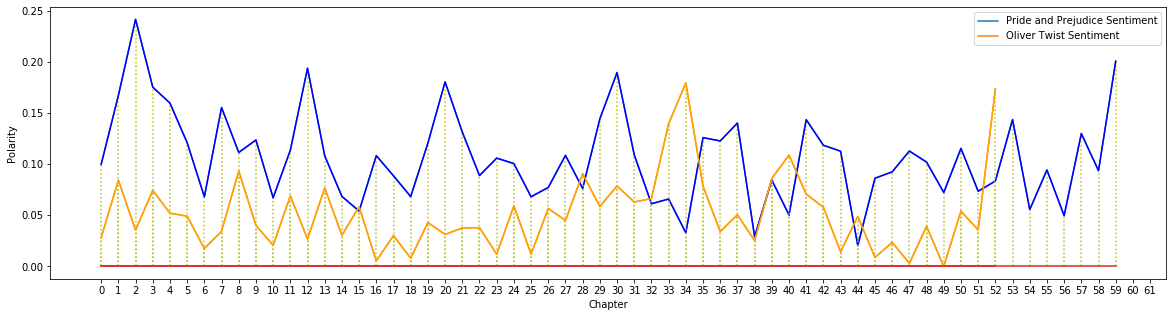

In [51]:
plt.figure(figsize=(20,5))
plt.plot(sentiment_list_PP,label='Pride and Prejudice Sentiment');
plt.plot(sentiment_list_OT, label='Oliver Twist Sentiment');
plt.stem(sentiment_list_PP, linefmt='y:',markerfmt='blue')
plt.stem(sentiment_list_OT, linefmt='y:', markerfmt='orange')
plt.ylabel('Polarity');
plt.xlabel('Chapter');
plt.xticks([x for x in range(62)])
plt.legend();

As predicted, Pride and Prejudice does offer better sentiment than Oliver Twist consistently across chapters. One thing of concern is that chapter 34 in Oliver Twist tends to show high polarity, although the chapter itself is not a particularly bright one. Perhaps there is a lot of positive text in there. Also, we should note that both novels have happy conclusions, as is evident in the spikes at the end. Let's look at subjectivity.

C:\Users\spiec\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.

C:\Users\spiec\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning:

In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.



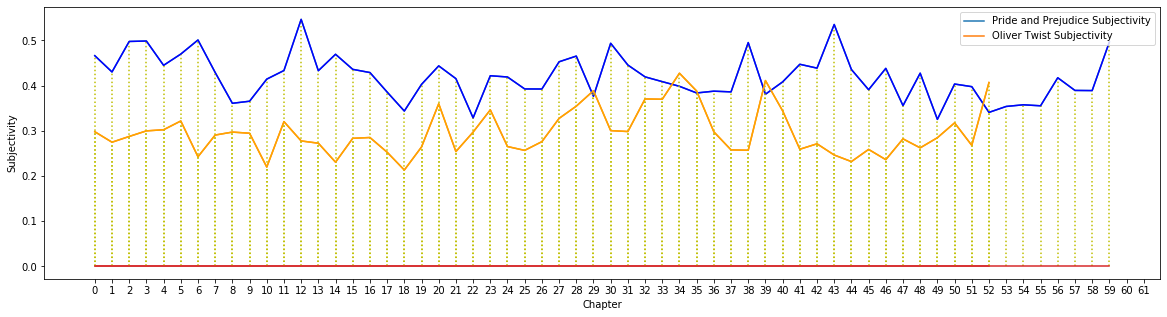

In [52]:
plt.figure(figsize=(20,5))
plt.plot(subjectivity_list_PP,label='Pride and Prejudice Subjectivity');
plt.plot(subjectivity_list_OT, label='Oliver Twist Subjectivity');
plt.stem(subjectivity_list_PP, linefmt='y:',markerfmt='blue');
plt.stem(subjectivity_list_OT, linefmt='y:', markerfmt='orange');
plt.ylabel('Subjectivity');
plt.xlabel('Chapter');
plt.xticks([x for x in range(62)])
plt.legend();

We can see an even clearer separation in terms of subjectivity between the two corpora.

### Conclusions

#### Word Frequencies and Top Words  

* Oliver Twist has over 70% more unique words than Pride and Prejudice, but both corpora adhere to Zipf's laws.  Perhaps Oliver Twist contains more jargon specific to the era and setting.
* Top words in each book fit closely with what is expected based on the stories.  Pride and Prejudice yields words relating to sisters, family and friends; while boy, man, and gentleman are prominent in Oliver Twist.

#### Character Network Analysis  

*  The character network in Pride and Prejudice consists mainly of one large network, with Elizabeth as the center character all throughout the book.  Elizabeth has close connections with many of the same characters throughout, and has the most connections as evidenced by her high degree centrality.  
*  Oliver Twist's character network contains two subnetworks with Oliver in the middle.  Oliver is the most central character overall, but looking by volume, Fagin takes the top spot in the latter part of the book.    
*  Character networks of both books expand as the book moves from volume 1 to volume 2, but then contract again when closing in volume 3.  This follows how we expect a novel to progress, that is, starting out with a set of characters, introducing more as the story progresses, and then bringing them all closer together, tying things up as the story concludes.
*  Overall, the Pride and Prejudice character network is smaller than that of Oliver Twist, i.e. it has smaller graph diameter and smaller average shortest path length.

#### Topic Modeling

Topic modeling yielded poor results, possibly for two reasons:
1. Neither book has multiple distinct themes
2. The corpora are not large enough for factorization / extracting latent features

#### Character Closeness using Word2Vec

For both Pride and Prejudice as well as Oliver Twist, the central characters show closeness in space. Even though the flattened word vectors in 2D don't always work as expected, we can generally see results consistent with the books.

#### Sentiment and Subjectivity Analysis

* Sentiment is consistently lower for Oliver Twist than for Pride and Prejudice. Both novels end on a good note in terms of sentiment.
* The same can be said for subjectivity. Perhaps Pride and Prejudice offers more of a window into the characters' thoughts and opinions.